In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [39]:
df=pd.read_csv("/content/drive/MyDrive/ECE9603/breast_cancer.csv")

In [40]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [41]:
df.shape

(569, 33)

In [42]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [44]:
df.dropna(axis=1,inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The dataset contains patients 212 with cancer and 357  with no cancer.

1. As we have so many features, so using pair plot
2. Get the correlation between the features


In [46]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

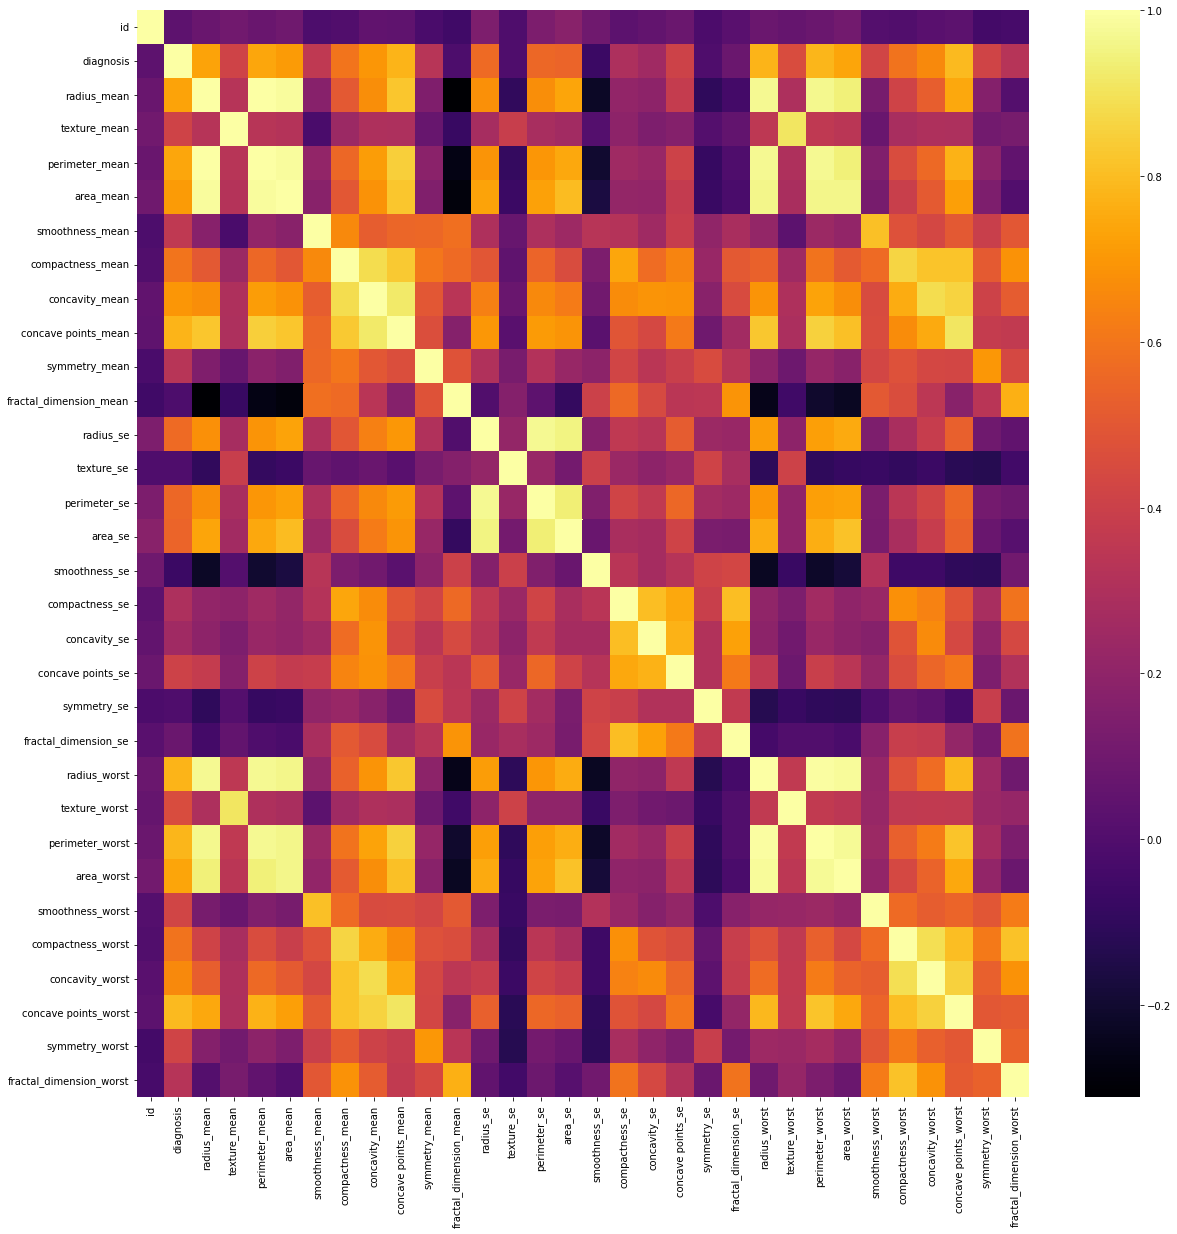

In [59]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='inferno')
plt.show()

**Encoding Categorical data values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


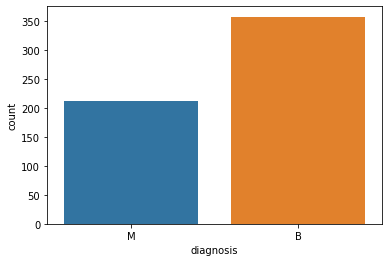

In [47]:
sns.countplot(df['diagnosis'],label='Cancer_count')

In [48]:
from sklearn.preprocessing import LabelEncoder
labelenco_y=LabelEncoder()
df.loc[:,'diagnosis']=labelenco_y.fit_transform(df.loc[:,'diagnosis'].values)   #input array to dataframe

**Pair plot with respect to all the correlated features**




In [49]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In heat map correlation we can se that 
1. concave_points_worst, 
2. area_worst,
3. perimeter_worst,
4. radius_worst,
5. concave points_mean, 
6. perimeter mean,
7. radius mean 

**these all are most 7 co-related with the diagnosis which is greater than 70%**

In [50]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [51]:
#plt.figure(figsize=(25,25))
#sns.heatmap(df.corr(),annot=True)

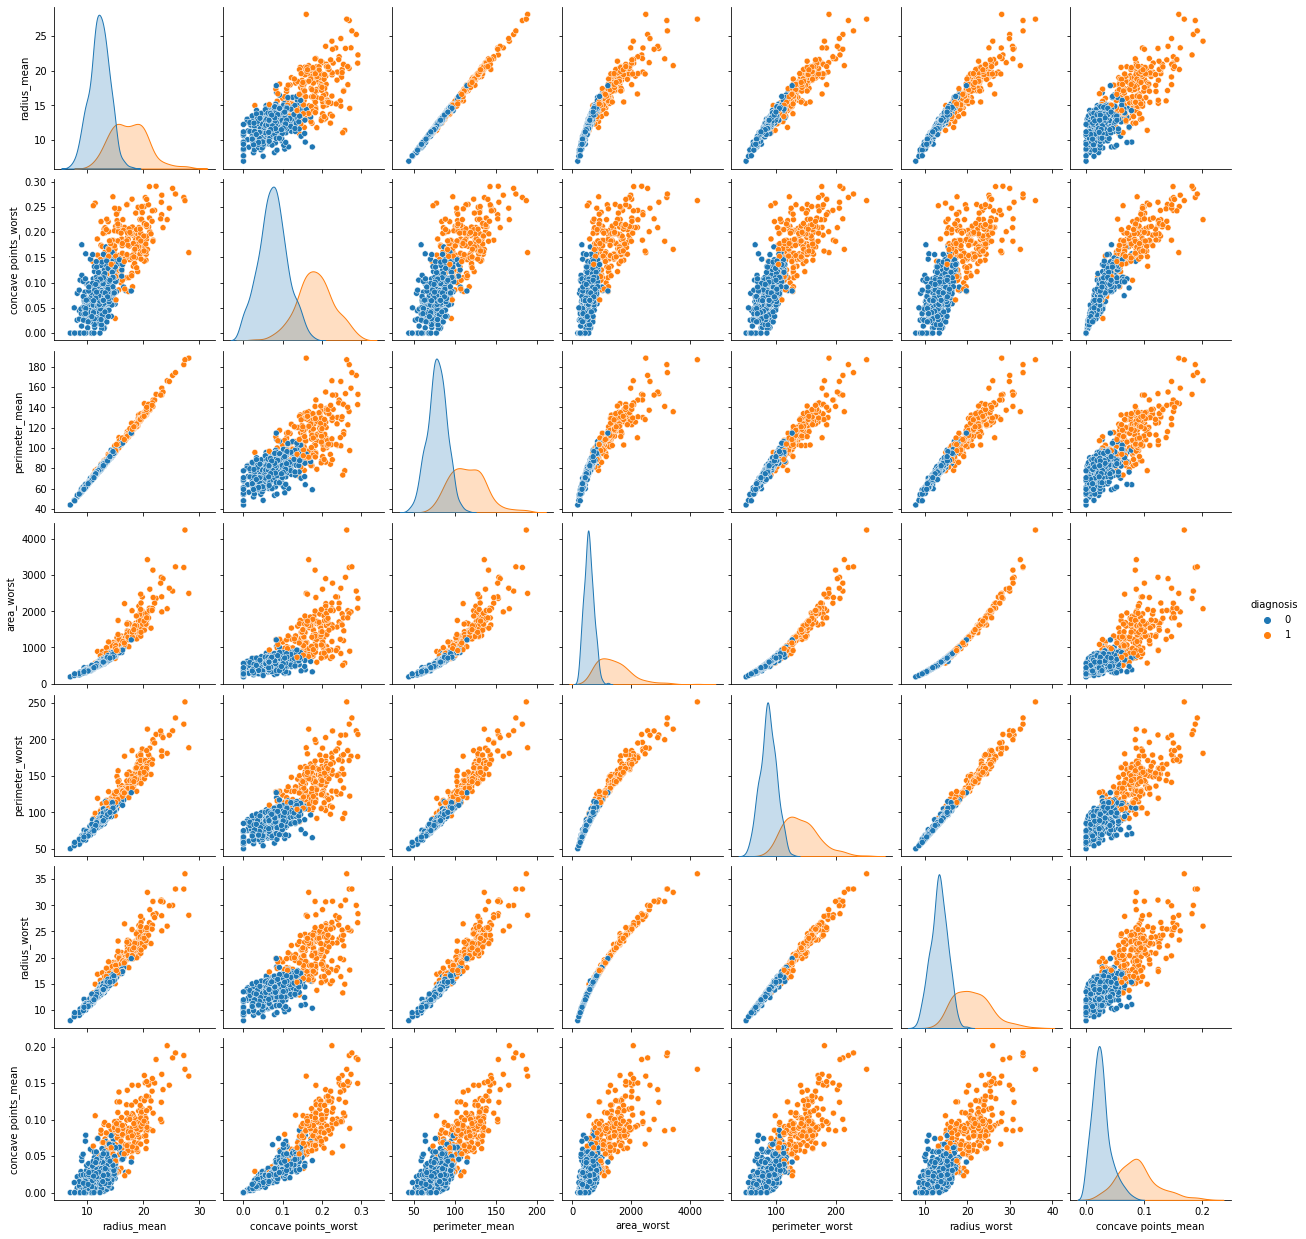

In [52]:
sns.pairplot(df, hue = 'diagnosis', 
            vars = ['radius_mean', 'concave points_worst', 'perimeter_mean', 'area_worst', 'perimeter_worst','radius_worst','concave points_mean'] )


** Scaling the data so that different magnitude and range of data can get into 1 range **

**Split the dataset in to X and Y**

This plot is showing the factors by which we can predit to detect the cancer

**Split Dataset in to 75% training and 25% testing **

In [53]:
X=df.iloc[:,2:]
Y=df.iloc[:,1]
          

In [54]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1,shuffle = True, stratify = Y) 

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


In [56]:
X_test_sc

array([[-0.06806416, -0.71504457, -0.13932268, ..., -0.88648146,
        -0.87406636, -0.71051111],
       [-0.23094803,  0.52784098, -0.27485095, ..., -0.87787255,
        -0.43215957, -0.95901903],
       [ 4.00117514, -0.19099208,  3.99181025, ...,  0.6562944 ,
        -2.02141708, -1.57783106],
       ...,
       [-1.02822174,  0.88030106, -1.03471827, ..., -1.24731348,
        -1.09100242, -0.89402465],
       [-0.69388115, -0.72431984, -0.67771698, ..., -0.25432037,
        -0.16380163, -0.21294909],
       [-0.8253313 ,  0.13132339, -0.82440154, ..., -1.41103118,
         0.62038206, -1.03329832]])

**Training, crossvalidation, evaluation all the 3 models**

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def models(X_train,Y_train):
  #Logistic Regression
  print()
  print('Logistic Regression')
  print()
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=51)
  log.fit(X_train,Y_train)
  y_pred_log=log.predict(X_test_sc)
  cm=confusion_matrix(Y_test,y_pred_log)
  plt.title('Heatmap of Confusion Matrix', fontsize = 15)
  sns.heatmap(cm, annot = True)
  plt.show()
  print(cm)
  print(classification_report(Y_test,y_pred_log))
  print(accuracy_score(Y_test,y_pred_log))
  print()
  print('All K- fold cross val',cross_val_score(log, X_train_sc, Y_train, cv=5))
  print('Mean of all K-fold cross Val',np.mean(cross_val_score(log, X_train_sc, Y_train, cv=5)))

  #Decision Tree
  print()
  print('Decision Tree')
  print()
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
  tree.fit(X_train, Y_train)
  y_pred_tree=tree.predict(X_test_sc)
  cm=confusion_matrix(Y_test,y_pred_tree)
  plt.title('Heatmap of Confusion Matrix', fontsize = 15)
  sns.heatmap(cm, annot = True)
  plt.show()
  print(cm)
  print(classification_report(Y_test,y_pred_tree))
  print(accuracy_score(Y_test,y_pred_tree))
  print()
  print('All K- fold cross val',cross_val_score(tree, X_train_sc, Y_train, cv=5))
  print('Mean of all K-fold cross Val',np.mean(cross_val_score(tree, X_train_sc, Y_train, cv=5)))


  # K – Nearest Neighbor Classifier
  print()
  print('K – Nearest Neighbor Classifier(KNN)')
  print()
  from sklearn.neighbors import KNeighborsClassifier
  knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)
  y_pred_knn=knn.predict(X_test_sc)
  cm=confusion_matrix(Y_test,y_pred_knn)
  plt.title('Heatmap of Confusion Matrix', fontsize = 15)
  sns.heatmap(cm, annot = True)
  plt.show()
  print(cm)
  print(classification_report(Y_test,y_pred_knn))
  print(accuracy_score(Y_test,y_pred_knn))
  print()
  print('All K- fold cross val',cross_val_score(knn, X_train_sc, Y_train, cv=5))
  print('Mean of all K-fold cross Val',np.mean(cross_val_score(knn, X_train_sc, Y_train, cv=5)))

  print()
  

  return log,tree,knn


Logistic Regression



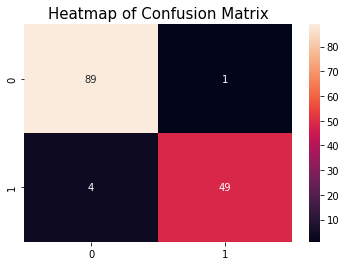

[[89  1]
 [ 4 49]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.92      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

0.965034965034965

All K- fold cross val [1.         0.96470588 0.97647059 0.95294118 1.        ]
Mean of all K-fold cross Val 0.9788235294117648

Decision Tree



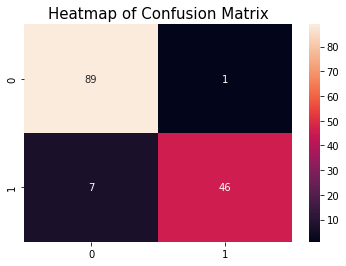

[[89  1]
 [ 7 46]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        90
           1       0.98      0.87      0.92        53

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143

0.9440559440559441

All K- fold cross val [0.96511628 0.95294118 0.91764706 0.96470588 0.95294118]
Mean of all K-fold cross Val 0.9506703146374829

K – Nearest Neighbor Classifier(KNN)



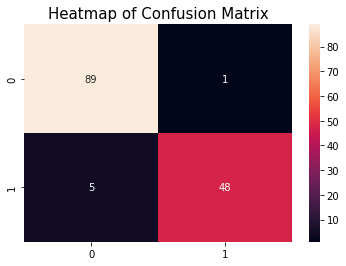

[[89  1]
 [ 5 48]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

All K- fold cross val [0.98837209 0.95294118 0.92941176 0.96470588 1.        ]
Mean of all K-fold cross Val 0.9670861833105334



In [58]:
model=models(X_train_sc,Y_train)